In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def draw_correlation_matrix(df):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(5, 5))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True) #color_palette("GnBu_d")
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, square=True, 
                linewidths=.5, cbar_kws={"shrink": .5})

In [3]:
INPUT = './data/'

In [4]:
data = pd.read_csv(INPUT + 'villes.txt', sep=' ')

In [5]:
data

,janvier,février,mars,avril,mai,juin,juillet,aout,septembre,octobre,novembre,décembre,lat,long,moy,amp
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.5,-0.34,13.3,15.4
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.2,-4.29,10.8,10.2
Clermont-Ferrand,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.5,3.05,10.9,16.8
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.1,5.43,11.0,18.6
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.4,3.04,9.7,14.7
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.5,4.51,11.4,18.6
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.2,5.24,14.2,17.8
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.4,3.53,13.9,17.1
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.1,-1.33,11.7,13.8
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.4,7.15,14.8,15.2


In [6]:
active = data.iloc[:, 0:12]
illustrative = data.iloc[:, 12:]

In [7]:
active.describe()

,janvier,février,mars,avril,mai,juin,juillet,aout,septembre,octobre,novembre,décembre
count,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.973333,4.833333,8.233333,10.98000,14.433333,17.833333,19.833333,19.566667,16.986667,12.320000,7.926667,4.846667
std,2.007296,1.868409,1.529083,1.41482,1.504596,1.793507,2.128939,2.011988,1.848114,1.829988,1.803753,1.958449
min,0.400000,1.500000,5.600000,8.90000,11.600000,14.400000,15.600000,16.000000,14.700000,9.500000,4.900000,1.300000
25%,2.400000,3.350000,7.550000,10.00000,13.700000,17.150000,18.900000,18.450000,15.850000,11.300000,6.600000,3.450000
50%,4.700000,5.300000,7.800000,10.70000,14.300000,17.500000,19.400000,19.100000,16.400000,11.600000,7.800000,5.400000
75%,5.550000,6.200000,9.550000,12.20000,15.350000,19.000000,20.900000,20.950000,18.450000,13.550000,9.050000,6.350000
max,7.500000,8.500000,10.800000,13.30000,16.800000,20.800000,23.300000,22.800000,20.300000,16.000000,11.500000,8.200000


In [8]:
std_active = StandardScaler().fit_transform(active)

In [30]:
pca_active = PCA(n_components=2).fit(std_active)
print(pca_active.explained_variance_ratio_)
print(sum(pca_active.explained_variance_ratio_))

[0.79848163 0.18970153]
0.9881831649664493


In [38]:
std_active.shape

(15, 12)

In [36]:
pca_active.transform(std_active).shape

(15, 2)

In [80]:
df_pca_active = pd.DataFrame(pca_active.transform(std_active), index=active.index, columns=['pc1', 'pc2']) 
df_pca_active

,pc1,pc2
Bordeaux,3.120707,0.109297
Brest,-2.268005,4.093307
Clermont-Ferrand,-1.725936,-0.592532
Grenoble,-1.529258,-1.687948
Lille,-4.216825,0.595201
Lyon,-0.834940,-1.788228
Marseille,4.832722,-0.828803
Montpellier,4.147302,-0.435351
Nantes,-0.281289,1.114563
Nice,6.007035,0.789308


In [81]:
total_values = df_pca_active.abs().sum(axis=0) # by column axis=0
df_pca_active['pc1_contribution'] = df_pca_active.apply(lambda row: 100 * abs(row['pc1']) / total_values[0], axis=1)
df_pca_active['pc2_contribution'] = df_pca_active.apply(lambda row: 100 * abs(row['pc2']) / total_values[1], axis=1)

In [82]:
df_pca_active

,pc1,pc2,pc1_contribution,pc2_contribution
Bordeaux,3.120707,0.109297,7.863127,0.652690
Brest,-2.268005,4.093307,5.714606,24.444078
Clermont-Ferrand,-1.725936,-0.592532,4.348775,3.538436
Grenoble,-1.529258,-1.687948,3.853214,10.079951
Lille,-4.216825,0.595201,10.624974,3.554375
Lyon,-0.834940,-1.788228,2.103766,10.678793
Marseille,4.832722,-0.828803,12.176825,4.949379
Montpellier,4.147302,-0.435351,10.449799,2.599792
Nantes,-0.281289,1.114563,0.708754,6.655859
Nice,6.007035,0.789308,15.135697,4.713528


In [83]:
df_pca_active.sum()

pc1                 8.881784e-16
pc2                -1.665335e-15
pc1_contribution    1.000000e+02
pc2_contribution    1.000000e+02
dtype: float64

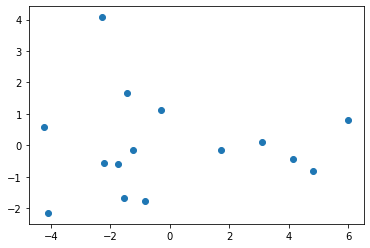

In [85]:
plt.scatter(df_pca_active['pc1'], df_pca_active['pc2'])

In [86]:
df_pca_active.describe()

,pc1,pc2,pc1_contribution,pc2_contribution
count,1.500000e+01,1.500000e+01,15.000000,15.000000
mean,5.921189e-17,-1.406282e-16,6.666667,6.666667
std,3.204090e+00,1.561736e+00,4.190214,6.273744
min,-4.216825e+00,-2.172253e+00,0.708754,0.652690
25%,-1.963712e+00,-7.106677e-01,3.739066,3.017400
50%,-1.241938e+00,-1.563459e-01,5.547005,4.713528
75%,2.428437e+00,6.922549e-01,10.397261,10.029711
max,6.007035e+00,4.093307e+00,15.135697,24.444078


In [87]:
covariance = pca_active.get_covariance()

In [88]:
covariance[0]

array([1.07720527, 1.03886645, 0.89600327, 0.64969957, 0.3851045 ,
       0.36071786, 0.32076371, 0.43686522, 0.65048407, 0.91519127,
       1.02000024, 1.05892791])

In [89]:
eigenvalues = pca_active.explained_variance_
print(eigenvalues)
print(pca_active.singular_values_)
print(pca_active.components_)
print(sum(pca_active.get_precision()[0]))

[10.26619241  2.43901971]
[11.98860683  5.84348149]
[[ 0.24592211  0.28443658  0.31296643  0.31314906  0.28195125  0.27898242
   0.27186223  0.29029943  0.31466521  0.31664588  0.29196226  0.25015301]
 [ 0.42705875  0.31089916  0.10340033 -0.1349923  -0.31463106 -0.33096004
  -0.35221804 -0.28495769 -0.13792688  0.11297634  0.27434474  0.41377505]]
7.586634877088095


In [90]:
df_months_comp = pd.DataFrame(pca_active.components_,columns=active.columns, index = ['pc1','pc2'])
df_months_comp

,janvier,février,mars,avril,mai,juin,juillet,aout,septembre,octobre,novembre,décembre
pc1,0.245922,0.284437,0.312966,0.313149,0.281951,0.278982,0.271862,0.290299,0.314665,0.316646,0.291962,0.250153
pc2,0.427059,0.310899,0.103400,-0.134992,-0.314631,-0.330960,-0.352218,-0.284958,-0.137927,0.112976,0.274345,0.413775


In [91]:
df_months_comp.iloc[:,0]

pc1    0.245922
pc2    0.427059
Name: janvier, dtype: float64

In [92]:
def circleOfCorrelations(pc_infos, ebouli):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["pc1"])):
		x = pc_infos["pc1"][idx]
		y = pc_infos["pc2"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("pc1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("pc2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")

In [99]:
def circleOfCorrV2(pca, df):
    # Plot a variable factor map for the first two dimensions.
    (fig, ax) = plt.subplots(figsize=(12, 12))
    for i in range(0, len(pca.components_[0])):
        ax.arrow(0, 0,  # Start the arrow at the origin
                 pca.components_[0, i], pca.components_[1, i],  # 0 and 1 correspond to dimension 1 and 2
                 head_width=0.1,head_length=0.1)
        plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, df.columns.values[i])

    an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    ax.set_title('Variable factor map')
    plt.show()

In [93]:
df_pca_active.corr()

,pc1,pc2,pc1_contribution,pc2_contribution
pc1,1.000000e+00,-1.426305e-16,0.469974,-0.400149
pc2,-1.426305e-16,1.000000e+00,-0.053066,0.409762
pc1_contribution,4.699736e-01,-5.306624e-02,1.000000,-0.130404
pc2_contribution,-4.001487e-01,4.097625e-01,-0.130404,1.000000


In [107]:
pca_active.components_

array([[ 0.24592211,  0.28443658,  0.31296643,  0.31314906,  0.28195125,
         0.27898242,  0.27186223,  0.29029943,  0.31466521,  0.31664588,
         0.29196226,  0.25015301],
       [ 0.42705875,  0.31089916,  0.10340033, -0.1349923 , -0.31463106,
        -0.33096004, -0.35221804, -0.28495769, -0.13792688,  0.11297634,
         0.27434474,  0.41377505]])

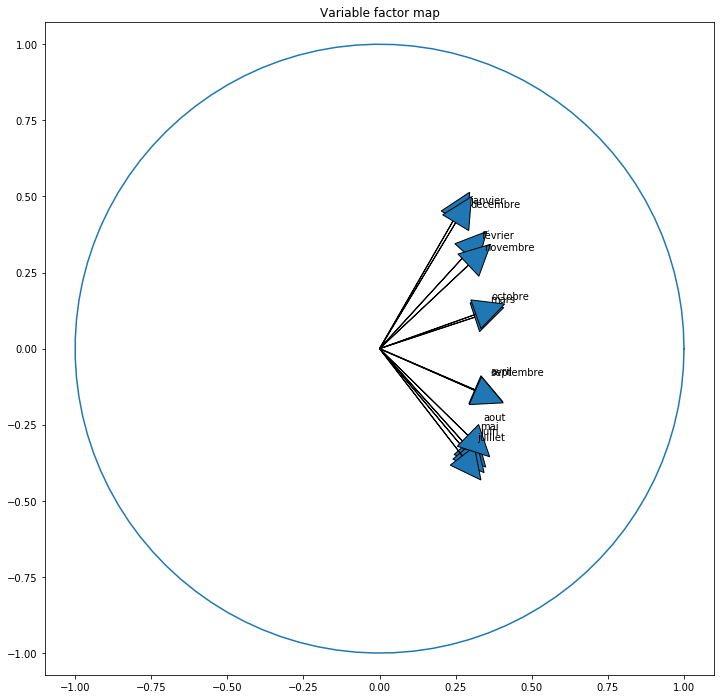

In [108]:
circleOfCorrV2(pca_active, df_months_comp)

In [101]:
df_pca_active

,pc1,pc2,pc1_contribution,pc2_contribution
Bordeaux,3.120707,0.109297,7.863127,0.652690
Brest,-2.268005,4.093307,5.714606,24.444078
Clermont-Ferrand,-1.725936,-0.592532,4.348775,3.538436
Grenoble,-1.529258,-1.687948,3.853214,10.079951
Lille,-4.216825,0.595201,10.624974,3.554375
Lyon,-0.834940,-1.788228,2.103766,10.678793
Marseille,4.832722,-0.828803,12.176825,4.949379
Montpellier,4.147302,-0.435351,10.449799,2.599792
Nantes,-0.281289,1.114563,0.708754,6.655859
Nice,6.007035,0.789308,15.135697,4.713528


In [105]:
df_pca_active.iloc[:,0:2]

,pc1,pc2
Bordeaux,3.120707,0.109297
Brest,-2.268005,4.093307
Clermont-Ferrand,-1.725936,-0.592532
Grenoble,-1.529258,-1.687948
Lille,-4.216825,0.595201
Lyon,-0.834940,-1.788228
Marseille,4.832722,-0.828803
Montpellier,4.147302,-0.435351
Nantes,-0.281289,1.114563
Nice,6.007035,0.789308
